In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
train_data.head(5)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [5]:
train_data.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [6]:
train_set = train_data.iloc[:, 1:2].values ##separating out the OPEN column

In [7]:
train_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [8]:
from sklearn.preprocessing import MinMaxScaler ##feature scaling

In [9]:
norm = MinMaxScaler(feature_range=(0,1))

In [10]:
scaled_train = norm.fit_transform(train_set)

In [11]:
scaled_train

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### imp : number of timesteps

In [12]:
x_train = []
y_train = []

In [13]:
train_data.tail(5)

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [14]:
for i in range(60,1258):
    x_train.append(scaled_train[i-60:i, 0])
    y_train.append(scaled_train[i, 0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [15]:
x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [16]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

### Reshaping the data into a 3D structure for the RNN

In [46]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [18]:
x_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [19]:
x_train.shape

(1198, 60, 1)

### Building the LSTM and RNN

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [21]:
rnn_model = Sequential()

rnn_model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
rnn_model.add(Dropout(0.2))

rnn_model.add(LSTM(units = 50, return_sequences = True))
rnn_model.add(Dropout(0.2))

rnn_model.add(LSTM(units = 50, return_sequences = True))
rnn_model.add(Dropout(0.2))

rnn_model.add(LSTM(units = 50))
rnn_model.add(Dropout(0.2))

rnn_model.add(Dense(units = 1))


In [22]:
rnn_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
rnn_model.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 19s 110ms/step - loss: 0.0987
Epoch 2/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0091
Epoch 3/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0041
Epoch 7/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0051
Epoch 8/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0041
Epoch 9/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0038
Epoch 10/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0063
Epoch 12/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0042
Epoch 13/100
38/38 [===

## Preparing the test data for preparations

In [26]:
test_data = pd.read_csv('Google_Stock_Price_Test.csv')

In [27]:
test_set = test_data.iloc[:, 1:2].values

In [28]:
test_data

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [29]:
test_set

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [30]:
test_set.shape

(20, 1)

### Peparing the data for prediction

In [32]:
total_data = pd.concat((train_data['Open'],test_data['Open']), axis=0)

In [39]:
total_data

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [33]:
data_for_test = total_data[len(total_data) - len(test_data) - 60:].values

In [43]:
data_for_test = data_for_test.reshape(-1,1)
data_for_test

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [44]:
data_for_test = norm.transform(data_for_test)

In [45]:
x_test = []

for i in range(60,80):
    x_test.append(data_for_test[i-60:i,0])


In [47]:
x_test = np.array(x_test)

In [48]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## Prediciting using the above test data

In [50]:
price_predicted = rnn_model.predict(x_test)

In [51]:
price_predicted = norm.inverse_transform(price_predicted)

## Plotting the results against the original

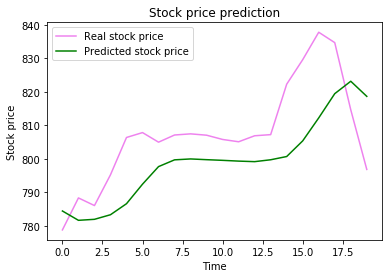

In [53]:
plt.plot(test_set, color = 'violet', label = 'Real stock price')
plt.plot(price_predicted, color = 'green', label = 'Predicted stock price')
plt.xlabel("Time")
plt.ylabel("Stock price")
plt.title('Stock price prediction')
plt.legend()
plt.show()